In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [17]:
# 导入数据，设置列名
def readDatasets(train_path, validation_path, test_path):
    iris_train = pd.read_csv(train_path, header=None, sep=',')
    iris_validation = pd.read_csv(validation_path, header=None, sep=',')
    iris_test = pd.read_csv(test_path, header=None, sep=',')
    iris_train.columns = ['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度', '类别']
    iris_validation.columns = ['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度', '类别']
    iris_test.columns = ['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度', '类别']
    return iris_train, iris_validation, iris_test

In [18]:
iris_train, iris_validation, iris_test = readDatasets('iris_train.data', 'iris_validation.data', 'iris_test.data')
# 构造完整数据集
iris_full = pd.concat([iris_train, iris_validation, iris_test])
iris_full = iris_full.reset_index(drop=True)

In [19]:
iris_train

,萼片长度,萼片宽度,花瓣长度,花瓣宽度,类别
0,5.7,2.9,4.2,1.3,Iris-versicolor
1,5.5,3.5,1.3,0.2,Iris-setosa
2,5.8,2.7,5.1,1.9,Iris-virginica
3,4.5,2.3,1.3,0.3,Iris-setosa
4,6.1,3.0,4.9,1.8,Iris-virginica
...,...,...,...,...,...
85,5.0,3.6,1.4,0.2,Iris-setosa
86,5.7,2.5,5.0,2.0,Iris-virginica
87,5.8,2.7,4.1,1.0,Iris-versicolor
88,5.1,2.5,3.0,1.1,Iris-versicolor


In [20]:
# 观察iris数据集的统计信息
iris_full.describe()

,萼片长度,萼片宽度,花瓣长度,花瓣宽度
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###### 利用pd.describe()能得到150个样本在4个属性上的均值、方差、最大值最小值等统计信息，但是无法得出更为直观、易于总结的信息，因此我们需要对数据进行可视化。

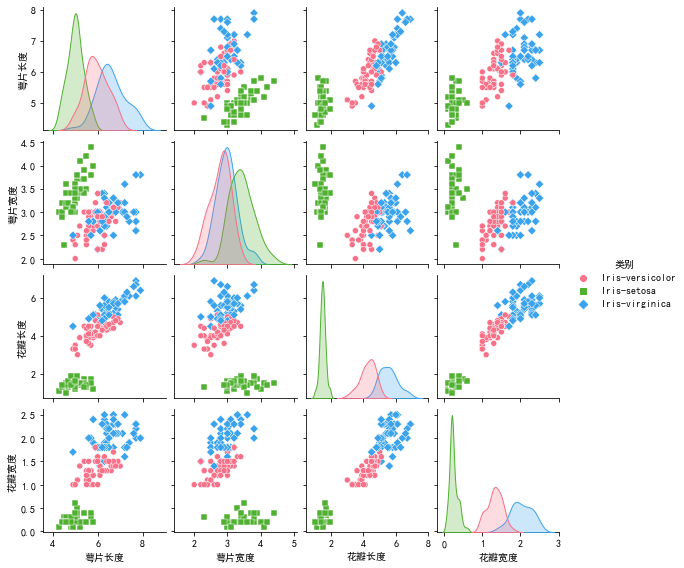

In [21]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False # 设置正常显示符号
sns.pairplot(data=iris_full, hue='类别', palette='husl', markers=["o", "s", "D"], height=2)

###### 分析主对角线上的四幅图可知，三类鸢尾花在萼片长度、萼片宽度上的分布存在混叠区域，而在花瓣长度、宽度上的分布则重叠区域较小。我们还可以发现，花瓣长度和花瓣宽度似乎存在较为明显的正相关关系，萼片长宽也存在一定的正相关，而萼片宽度和花瓣长宽之间的相关性较低。
###### 为了进一步分析各属性和鸢尾花类别之间的关系以及分析各属性间的相关性，我们可以绘制平行坐标系和相关热力图

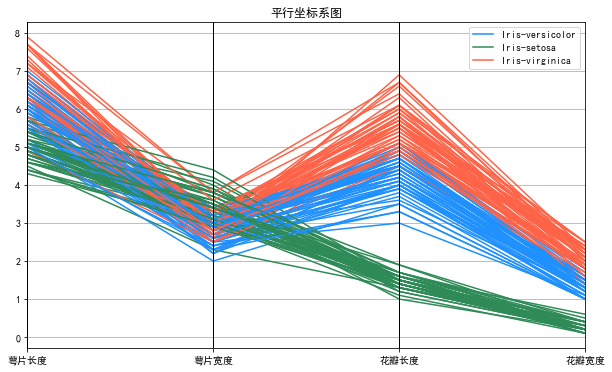

In [22]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False # 设置正常显示符号
plt.figure(figsize = (10,6)) 
parallel_coordinates(iris_full, "类别", color=['#1E90FF','#2E8B57','#FF6347'])
plt.title("平行坐标系图")
plt.show()

###### 通过平行坐标系可以明显看出，花瓣长度、花瓣宽度属性能够很好地将三类鸢尾花区分开来，而萼片长宽则无法做到这一点。也就是说，花瓣长宽这两个属性对于类别的预测贡献度应该是最高的。

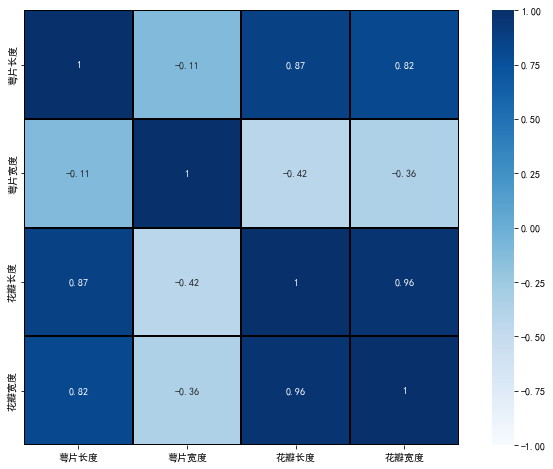

In [23]:
fig=plt.gcf()
fig.set_size_inches(12, 8)
fig=sns.heatmap(iris_full.corr(), annot=True, cmap='Blues', linewidth=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)

###### 分析相关热力图可知，花瓣长度和宽度之间的相关系数为0.96，是显著正相关；萼片长度和花瓣长宽之间也是显著正相关；而萼片宽度和花瓣长宽之间呈弱负相关。

In [24]:
# 先对类别进行labelencode，再将数据集划分为属性和标签两部分
X_train = iris_train.iloc[:, :4]
X_val = iris_validation.iloc[:, :4]
X_test = iris_test.iloc[:, :4]
labelencoder = LabelEncoder()
y_train = iris_train.iloc[:, 4]
y_val = iris_validation.iloc[:, 4]
y_test = iris_test.iloc[:, 4]
y_train, y_val, y_test = labelencoder.fit_transform(y_train), labelencoder.fit_transform(y_val), labelencoder.fit_transform(y_test)

In [25]:
y_train

array([1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1,
       2, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0,
       1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2,
       2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       1, 1])

In [26]:
# 生成随机颜色
import random
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for _ in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+ color

def plotROC(model_name, phase, y_true, conf):
    aucs = []
    for i in range(3):
        fpr, tpr, _ = roc_curve((y_true == i).astype(int), conf[:,i], drop_intermediate=False)
        area = auc(fpr, tpr)
        aucs.append(area)
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        # plt.legend(['AUC='+str(area)], loc='best')
        plt.plot(fpr, tpr, linestyle='dashed', color=randomcolor())

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['Class0'+' AUC='+str(format(aucs[0], '.4f')), 'Class1'+' AUC='+str(format(aucs[1], '.4f')), 'Class2'+' AUC='+str(format(aucs[2], '.4f'))])
    plt.title('ROC for '+model_name+' '+phase)
    plt.figure(figsize=(8,6))
    plt.show()

##### 1. SVM

The training accuracy of SVM is: 0.9888888888888889
The validation accuracy of SVM is: 0.9333333333333333
The test accuracy of SVM is: 1.0


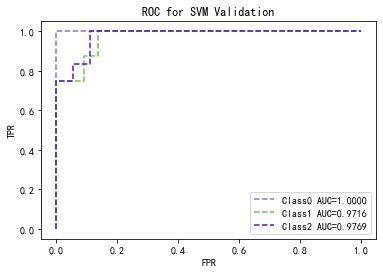

<Figure size 576x432 with 0 Axes>

In [27]:
# SVM
# gamma越小则决策边界越精简，泛化能力越强, gamma越大表示决策边界越复杂，泛化能力越弱
# C是控制软间隔中的松弛变量是否起作用，C越大表明越宽松，对松弛变量更容忍，C越小越严格，等于0时表示不允许有数据在支持向量之间。
model_svm = svm.SVC(C=1, gamma=0.2, probability=True)
# 训练SVM
model_svm.fit(X_train, y_train)
# 在训练集上的准确率
pred_svm_train = model_svm.predict(X_train)
print('The training accuracy of SVM is: {}'.format(metrics.accuracy_score(pred_svm_train, y_train)))
# 在验证集上的准确率
pred_svm_prob_val = model_svm.predict_proba(X_val)
pred_svm_val = model_svm.predict(X_val)
print('The validation accuracy of SVM is: {}'.format(metrics.accuracy_score(pred_svm_val, y_val)))
# 在测试集上测试最终准确率
pred_svm_prob_test = model_svm.predict_proba(X_test)
pred_svm_test = model_svm.predict(X_test)
print('The test accuracy of SVM is: {}'.format(metrics.accuracy_score(pred_svm_test, y_test)))
plotROC('SVM', 'Validation', y_val, pred_svm_prob_val)

##### 2. KNN

The training accuracy of KNN is: 0.9888888888888889
The validation accuracy of KNN is: 0.9
The test accuracy of KNN is: 0.9333333333333333


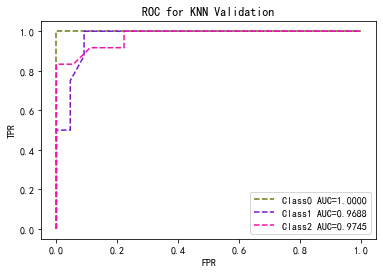

<Figure size 576x432 with 0 Axes>

In [28]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors=26, algorithm='auto')
model_knn.fit(X_train, y_train)
# 在训练集上的准确率
pred_knn_train = model_svm.predict(X_train)
print('The training accuracy of KNN is: {}'.format(metrics.accuracy_score(pred_knn_train, y_train)))
# 在验证集上的准确率
pred_knn_prob_val = model_knn.predict_proba(X_val)
pred_knn_val = model_knn.predict(X_val)
print('The validation accuracy of KNN is: {}'.format(metrics.accuracy_score(pred_knn_val, y_val)))
# 在测试集上测试最终准确率
pred_knn_prob_test = model_knn.predict_proba(X_test)
pred_knn_test = model_knn.predict(X_test)
print('The test accuracy of KNN is: {}'.format(metrics.accuracy_score(pred_knn_test, y_test)))
plotROC('KNN', 'Validation', y_val, pred_knn_prob_val)

##### 3. Decision Tree

The training accuracy of Decision Tree is: 0.9888888888888889
The validation accuracy of Decision Tree is: 0.8666666666666667
The test accuracy of Decision Tree is: 1.0


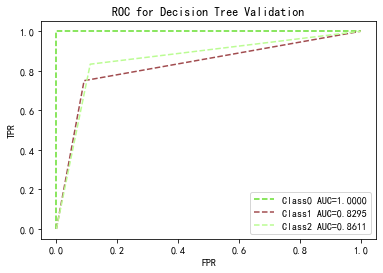

<Figure size 576x432 with 0 Axes>

In [29]:
# Decision Tree
model_dt = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=5)
model_dt.fit(X_train, y_train)
# 在训练集上的准确率
pred_dt_train = model_svm.predict(X_train)
print('The training accuracy of Decision Tree is: {}'.format(metrics.accuracy_score(pred_dt_train, y_train)))
# 在验证集上的准确率
pred_dt_prob_val = model_dt.predict_proba(X_val)
pred_dt_val = model_dt.predict(X_val)
print('The validation accuracy of Decision Tree is: {}'.format(metrics.accuracy_score(pred_dt_val, y_val)))
# 在测试集上测试最终准确率
pred_dt_prob_test = model_dt.predict_proba(X_test)
pred_dt_test = model_dt.predict(X_test)
print('The test accuracy of Decision Tree is: {}'.format(metrics.accuracy_score(pred_dt_test, y_test)))
plotROC('Decision Tree', 'Validation', y_val, pred_dt_prob_val)

##### 4. RF

The training accuracy of Random Forest is: 0.9888888888888889
The validation accuracy of Random Forest is: 0.9
The test accuracy of Random Forest is: 1.0


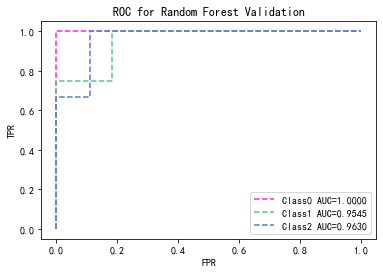

<Figure size 576x432 with 0 Axes>

In [30]:
# RF
model_rf = RandomForestClassifier(n_estimators=150)
model_rf.fit(X_train, y_train)
# 在训练集上的准确率
pred_rf_train = model_svm.predict(X_train)
print('The training accuracy of Random Forest is: {}'.format(metrics.accuracy_score(pred_rf_train, y_train)))
# 在验证集上的准确率
pred_rf_prob_val = model_rf.predict_proba(X_val)
pred_rf_val = model_rf.predict(X_val)
print('The validation accuracy of Random Forest is: {}'.format(metrics.accuracy_score(pred_rf_val, y_val)))
# 在测试集上测试最终准确率
pred_rf_prob_test = model_rf.predict_proba(X_test)
pred_rf_test = model_rf.predict(X_test)
print('The test accuracy of Random Forest is: {}'.format(metrics.accuracy_score(pred_rf_test, y_test)))
plotROC('Random Forest', 'Validation', y_val, pred_rf_prob_val)

In [ ]:
# plt.subplot(1,4,1)
# plotROC('SVM', 'Validation', y_val, pred_svm_prob_val)
# plt.subplot(1,4,2)
# plotROC('KNN', 'Validation', y_val, pred_knn_prob_val)
# plt.subplot(1,4,3)
# plotROC('Decision Tree', 'Validation', y_val, pred_dt_prob_val)
# plt.subplot(1,4,4)
# plotROC('Random Forest', 'Validation', y_val, pred_rf_prob_val)